In [ ]:
I задание (сформировать исходные данные)

In [1]:
#Проверка пользовательского ввода на диапазон:
while True:
    N = int(input("Введите N[500; 1000]: "))
    if 500 < N < 1000:
        print("Правильный диапазон")
        break
    else:
        print("Введите диапазон от 500 до 1000")

        

Введите N[500; 1000]: 400
Введите диапазон от 500 до 1000
Введите N[500; 1000]: 1001
Введите диапазон от 500 до 1000
Введите N[500; 1000]: 556
Правильный диапазон


In [2]:
while True:
    m = int(input("Введите m[10; 50]: "))
    if 10 < m < 50:
        print("Правильный диапазон")
        break
    else:
        print("Введите диапазон от 10 до 50")

Введите m[10; 50]: 9
Введите диапазон от 10 до 50
Введите m[10; 50]: 52
Введите диапазон от 10 до 50
Введите m[10; 50]: 14
Правильный диапазон


In [3]:
print(N, m)


556 14


In [20]:
#Заполнение списка случайными числами от -1 до 1
from random import uniform
import numpy as np

d = [[uniform(-1, 1) for j in range(m)] for i in range(N)]
d[:2]

[[0.3138503283166283,
  0.47591788627993004,
  0.19272099854371239,
  0.23992838152988805,
  -0.10196446034934792,
  -0.49520591477006515,
  0.34511588444289387,
  -0.030017106185897813,
  -0.2620977361081991,
  -0.4102716336404708,
  0.7773642177061042,
  -0.5592283313268627,
  0.7127988542014765,
  -0.23894786754706732],
 [0.47078890821134434,
  0.6754327569318395,
  -0.5117814424688012,
  0.7464234517133381,
  -0.4169583818648097,
  -0.8035502242260848,
  0.8165916773667676,
  -0.20005767109338946,
  -0.28839341172044364,
  0.023470589376439754,
  0.7761374136658004,
  0.8357712801699737,
  0.46659148775616943,
  -0.338052412126683]]

In [21]:
# Формирование из списка файл vectors.csv
import pandas as pd
frame = pd.DataFrame(d)
frame.to_csv("vectors.csv", index = False)

In [ ]:
II задание

In [22]:
# Чтение vectors.csv и вывод первых 5 строк из N
df = pd.read_csv("vectors.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.313850,0.475918,0.192721,0.239928,-0.101964,-0.495206,0.345116,-0.030017,-0.262098,-0.410272,0.777364,-0.559228,0.712799,-0.238948
1,0.470789,0.675433,-0.511781,0.746423,-0.416958,-0.803550,0.816592,-0.200058,-0.288393,0.023471,0.776137,0.835771,0.466591,-0.338052
2,0.522648,-0.319879,0.267711,-0.021013,-0.528949,0.439904,-0.291038,-0.121328,0.866205,0.275751,-0.324594,-0.471987,-0.390992,0.198636
3,0.504064,0.786517,0.780646,-0.265258,-0.238555,-0.637976,-0.764378,-0.938515,0.372979,-0.107781,0.941791,-0.672612,-0.706181,-0.463356
4,0.381213,0.952061,-0.719131,0.908850,-0.856126,-0.593552,0.733608,0.464420,-0.368286,0.922684,0.683110,-0.101653,-0.291776,-0.090844


In [24]:
# возвращение к списку векторов из датафрейма
import csv
with open('vectors.csv', 'r') as file:
        read = csv.reader(file)
        
        vec_list = []
        for line in read:
            vec_line = []
            for i in line:
                vec_line.append(float(i))
            vec_list.append(vec_line)
vec_list = vec_list[1:]
vec_list[:2]

[[0.3138503283166283,
  0.47591788627993004,
  0.19272099854371239,
  0.23992838152988805,
  -0.10196446034934792,
  -0.49520591477006515,
  0.34511588444289387,
  -0.030017106185897813,
  -0.2620977361081991,
  -0.4102716336404708,
  0.7773642177061042,
  -0.5592283313268627,
  0.7127988542014765,
  -0.23894786754706732],
 [0.47078890821134434,
  0.6754327569318395,
  -0.5117814424688012,
  0.7464234517133381,
  -0.4169583818648097,
  -0.8035502242260848,
  0.8165916773667676,
  -0.20005767109338946,
  -0.28839341172044364,
  0.023470589376439754,
  0.7761374136658004,
  0.8357712801699737,
  0.46659148775616943,
  -0.338052412126683]]

In [26]:
from scipy.spatial import distance

e = []
maxim, minim = 0, 0
pairs_max, pairs_min = (0, 0), (0, 0)

# max, его пары и список всех евкл-ых расстояний
for i in range(len(vec_list)):
    for j in range(i + 1, len(vec_list)):
        ev = distance.euclidean(vec_list[i], vec_list[j])
        if ev > maxim:
            pairs_max = (i, j)
            maxim = ev
        e.append(ev)
        
# 2-ой цикл для поиска пар минимума евкл-ого расстояния
# просто минимум есть в е
minim = maxim 

for i in range(len(vec_list)):
    for j in range(i + 1, len(vec_list)):
        ev = distance.euclidean(vec_list[i], vec_list[j])
        if ev < minim:
            pairs_min = (i, j)
            minim = ev
            
print("Максимальное евклидовое расстояние: ", max(e), "у пары", pairs_max)
print("Минимальное евклидовое расстояние: ", min(e), "у пары", pairs_min)
print("Список 20 евклидовых расстояний: ")
e[:20] # len(e) > m*N, поэтому можно попробовать через запись и чтение из файла


Максимальное евклидовое расстояние:  5.001893037058484 у пары (355, 506)
Минимальное евклидовое расстояние:  0.8715166301462701 у пары (206, 212)
Список 20 евклидовых расстояний: 


[1.8622798998895145,
 2.5682347331040076,
 2.3296963140101115,
 2.349769546486874,
 2.157996478875229,
 3.2792019213777333,
 2.4588957272919187,
 2.7457066223503683,
 3.0980899466052763,
 2.1097968814869508,
 2.507159910334068,
 2.2087724967813536,
 2.8356065067053344,
 2.044526674858063,
 2.7537637597003566,
 2.576709005814733,
 2.5698980458554415,
 2.5462895461966566,
 2.1033834896196186,
 2.2964600686864944]

In [27]:
#чтобы не использовать структуру данных больше m*N (список е) можно записать в файл и извлечь из файла
frame_e = pd.DataFrame(e)
frame_e.to_csv("eucledian.txt", index = False)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 2.3000e+01, 4.1000e+01, 8.6000e+01,
        1.5500e+02, 2.9800e+02, 5.1200e+02, 8.2400e+02, 1.2860e+03,
        1.9030e+03, 2.8380e+03, 3.6890e+03, 4.9990e+03, 6.3970e+03,
        7.9420e+03, 9.3620e+03, 1.0759e+04, 1.1607e+04, 1.2187e+04,
        1.2595e+04, 1.2084e+04, 1.1257e+04, 1.0129e+04, 8.5270e+03,
        7.0390e+03, 5.4810e+03, 4.1540e+03, 2.8790e+03, 1.9960e+03,
        1.3530e+03, 8.6900e+02, 5.0200e+02, 2.6100e+02, 1.3400e+02,
        7.8000e+01, 1.8000e+01, 1.3000e+01, 4.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
 <BarContainer object of 49 artists>)

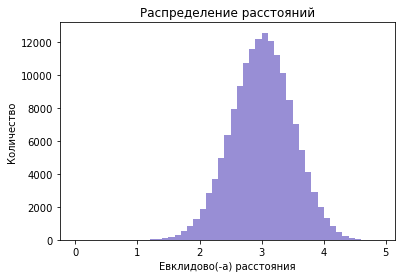

In [28]:
import matplotlib.pyplot as plt

#with open("eucledian.txt") as eucl:

b_rul = []
x = 0.0
for i in range(int(round(maxim) * 10)):
    b_rul.append(round(x, 2))
    x += 0.1
    
colors = ["#988ed5"]
plt.ylabel("Количество")
plt.xlabel("Евклидово(-а) расстояния")
plt.title("Распределение расстояний")

plt.hist(np.loadtxt("eucledian.txt"), bins = b_rul, color=colors)

#plt.xticks([i/10 for i in range(0, 1)])